In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import xarray as xr

import pims
from pims import ND2_Reader

import sys
sys.path.append("C:/Users/rmcgorty/Documents/GitHub/trackpy")
import trackpy as tp

import pickle

In [2]:
with open(r"210624_Vimentin_m04_p06_A_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tA = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_A001_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tA1 = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_B_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tB = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_B001_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tB1 = pickle.load(input_file)

In [21]:
stubsize=5
tAn = tp.filter_stubs(tA,  stubsize)
tA1n = tp.filter_stubs(tA1,  stubsize)
tBn = tp.filter_stubs(tB,  stubsize)
tB1n = tp.filter_stubs(tB1,  stubsize)

In [22]:
imxA = tp.imsd(tAn, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA = tp.imsd(tAn, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxA1 = tp.imsd(tA1n, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA1 = tp.imsd(tA1n, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB = tp.imsd(tBn, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB = tp.imsd(tBn, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB1 = tp.imsd(tB1n, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB1 = tp.imsd(tB1n, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

In [7]:
usernm = 'rmcgorty'
fit_saved_dir = "C:/Users/%s/Dropbox/ManuscriptsInProgress/DDM of cytoskeleton - JoVE/Data/" % usernm
fit04_06_A = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_A.nc")
fit04_06_A1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_A1.nc")
fit04_06_B = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_B.nc")
fit04_06_B1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_B1.nc")



Mentions getting the ISF from single particle tracking data:
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.078001


In [196]:
isf = np.zeros((5,1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
num_particles = np.zeros((1000))
q = 2*np.sqrt(2)
count=0

qs = np.array([1.98,3.02,3.96,5.0,6.04])

for j in range(5):
    q = qs[j]*np.sqrt(np.pi)
    
    qx = np.arange(0, q, 0.1)
    qy = np.sqrt(q**2 - qx**2)
    
    for i in range(1000):
        count=0
        temp = []
        for particle in imxA.keys():
            if not np.isnan(imxA[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
       
        for particle in imxA1.keys():
            if not np.isnan(imxA1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
                    
        for particle in imxB.keys():
            if not np.isnan(imxB[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
                    
        for particle in imxB1.keys():
            if not np.isnan(imxB1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
          
        isf[j,i] = np.mean(temp)
        isf_std[j,i] = np.std(temp)
        isf_stderr[j,i] = np.std(temp)/np.sqrt(len(temp))
        #isf[i] = isf[i]/count

In [197]:
num_particles

array([907., 821., 761., 736., 687., 662., 620., 596., 572., 552., 523.,
       500., 488., 466., 456., 439., 425., 414., 398., 390., 382., 375.,
       362., 355., 349., 343., 339., 330., 324., 320., 305., 297., 293.,
       290., 284., 282., 278., 273., 268., 263., 260., 253., 250., 243.,
       241., 239., 237., 236., 235., 233., 232., 227., 226., 223., 219.,
       213., 210., 207., 204., 202., 202., 201., 199., 198., 197., 197.,
       195., 194., 193., 193., 191., 191., 190., 188., 188., 187., 185.,
       183., 181., 180., 180., 176., 176., 175., 172., 171., 170., 169.,
       167., 165., 165., 165., 165., 164., 164., 163., 160., 160., 160.,
       159., 158., 157., 156., 154., 153., 153., 153., 153., 153., 152.,
       150., 150., 148., 148., 147., 146., 145., 145., 144., 143., 143.,
       142., 142., 140., 139., 139., 139., 139., 139., 139., 139., 138.,
       138., 138., 137., 135., 134., 134., 134., 133., 133., 133., 133.,
       133., 133., 133., 133., 133., 132., 131., 13

In [195]:
with open(r"isf_m04_at5qs_new.pkl",'wb') as output_file:
    pickle.dump(isf, output_file)
with open(r"isf_stderr_m04_at5qs_new.pkl",'wb') as output_file:
    pickle.dump(isf_stderr, output_file)
with open(r"isf_std_m04_at5qs_new.pkl",'wb') as output_file:
    pickle.dump(isf_std, output_file)
with open(r"for_isf_m04_trackpytimes.pkl",'wb') as output_file:
    pickle.dump(imxA.index, output_file)

In [27]:
############################
# QUICKER CALCULATION      #
############################

isf = np.zeros((5,1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
q = 2*np.sqrt(2)
count=0

qs = np.array([1.98,3.02,3.96,5.0,6.04])

for j in range(5):
    q = qs[j]*(5./3) #*np.sqrt(np.pi)
    
    qx = np.arange(0, q, 0.6)
    qy = np.sqrt(q**2 - qx**2)
    
    for i in range(90):
        count=0
        temp = []
        for particle in imxA.keys():
            if not np.isnan(imxA[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                temp.append(np.mean(temp2))
       
        for particle in imxA1.keys():
            if not np.isnan(imxA1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                temp.append(np.mean(temp2))
                    
        for particle in imxB.keys():
            if not np.isnan(imxB[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                temp.append(np.mean(temp2))
                    
        for particle in imxB1.keys():
            if not np.isnan(imxB1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                temp.append(np.mean(temp2))
          
        isf[j,i] = np.mean(temp)
        isf_std[j,i] = np.std(temp)
        isf_stderr[j,i] = np.std(temp)/np.sqrt(len(temp))
        #isf[i] = isf[i]/count

<IPython.core.display.Javascript object>


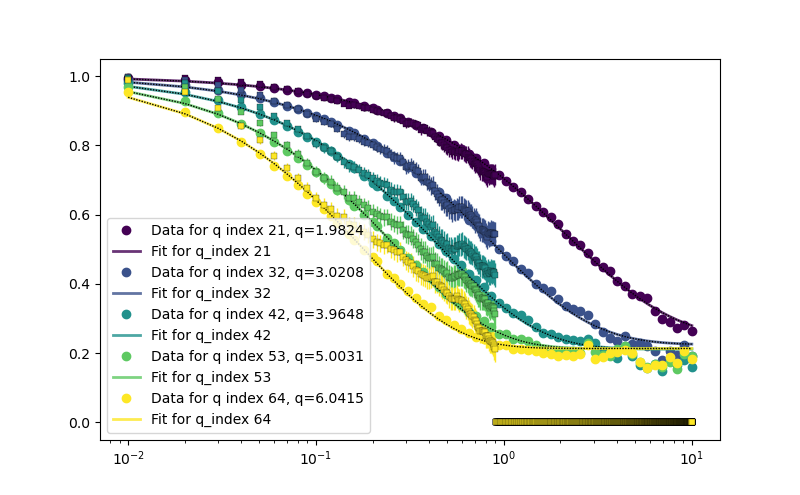

C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex valu

In [28]:
cmap = plt.get_cmap("viridis") 


fig_width = 8
markersize = 6 #was 1
fig, ax = plt.subplots(nrows=1, figsize=(fig_width,fig_width/1.618))
data = 0.25 * (fit04_06_A.isf_data + fit04_06_A1.isf_data + fit04_06_B.isf_data + fit04_06_B1.isf_data)
theory = 0.25 * (fit04_06_A.theory + fit04_06_A1.theory + fit04_06_B.theory + fit04_06_B1.theory)
times = fit04_06_A.lagtime
q = fit04_06_A.q    
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

#q_index_to_plot = np.arange(12,100,7)
q_index_to_plot = np.array([21,32,42,53,64])
clrs = np.linspace(0,1,len(q_index_to_plot))
for i,qv in enumerate([21,32,42,53,64]):
    plt_color = cmap(clrs[i])
    qv = int(qv)

    ax.semilogx(times, data[:,qv], 'o', ms=markersize, color=plt_color, label="Data for q index %i, q=%.4f" % (qv, q[qv]))
    ax.semilogx(times, theory[:,qv], '-', color=plt_color, lw=2, alpha=0.8, label="Fit for q_index %i" % qv)
    ax.semilogx(times, theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)
    
    #ax.semilogx(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, 's', ms=4, color=plt_color, mec='k', mew=0.2)
    #ax.errorbar(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, yerr=isf_stderr[i,:], fmt='none', color=plt_color, lw=1)
    
    ax.semilogx(imxA.index, np.real(isf[i,:]), 's', ms=4, color=plt_color, mec='k', mew=0.2)
    ax.errorbar(imxA.index, np.real(isf[i,:]), yerr=isf_stderr[i,:], fmt='none', color=plt_color, lw=1)

plt.legend()

#plt.semilogx(imxA.index, isf, 'ro')
#plt.errorbar(imxA.index, isf, yerr=isf_stderr, fmt='none', color='r')

## Getting van Hove distribution

In [90]:
from scipy.optimize import curve_fit

In [91]:
# Gaussian function
def gaus_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gaus_exp_func(x, a, x0, sigma, b, lam):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + b*np.exp(-1*abs(x-x0)/lam)

In [127]:
bins = np.arange(-2,2,0.015)

posX = tA.set_index(['frame','particle'])['x'].unstack()
posY = tA.set_index(['frame','particle'])['y'].unstack()

lagframes = 10


vhX = tp.vanhove(posX, lagframes, ensemble=True, mpp=0.13, bins=bins)
vhY = tp.vanhove(posY, lagframes, ensemble=True, mpp=0.13, bins=bins)

prob10 = 0.5*(vhX+vhY)

popt10, pcovR = curve_fit(gaus_func, bins[:-1], prob10)
popt10E, pcovRE = curve_fit(gaus_exp_func, bins[:-1], prob10, p0=[2,0,0.1,1,0.1])

C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [128]:
popt10

array([1.08621950e+00, 7.85394267e-04, 1.76411326e-01])

<IPython.core.display.Javascript object>


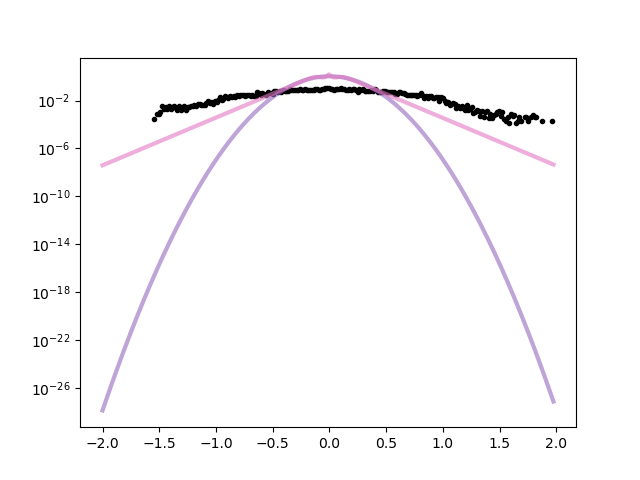

In [144]:
plt.figure()
#plt.semilogy(vhX.index, vhX, 'ro')
#plt.semilogy(vhX.index, vhY, 'bo')
#plt.semilogy(vhX.index, 0.5*(vhX+vhY), 'go')
plt.semilogy(bins[:-1], 0.5*(vhX+vhY), 'k.')

plt.plot(bins[:-1], gaus_func(bins[:-1], popt10[0], popt10[1], popt10[2]), '-', lw=3, alpha=0.6, c='tab:purple')
plt.plot(bins[:-1], gaus_exp_func(bins[:-1], popt10E[0], popt10E[1], popt10E[2], popt10E[3], popt10E[4]), '-', lw=3, alpha=0.6, c='tab:pink')

<IPython.core.display.Javascript object>


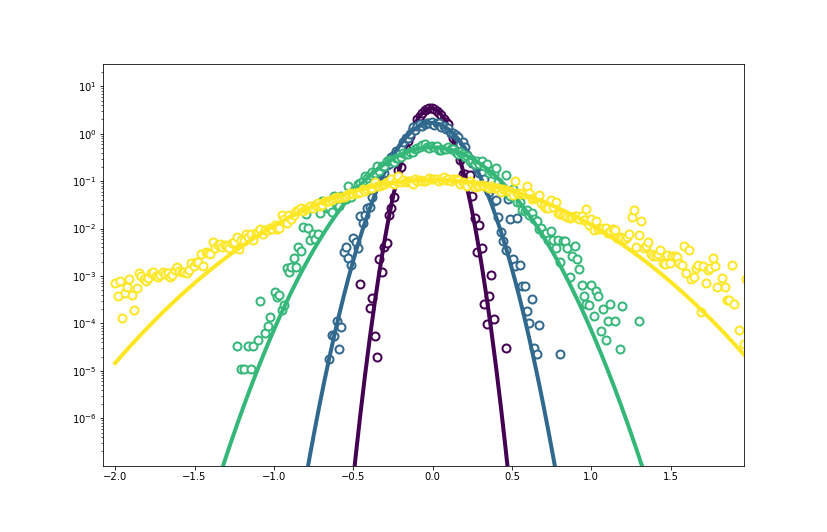

0


C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


1
2
3


In [166]:
bins = np.arange(-2,2,0.015)
cmap = plt.get_cmap("viridis")
lag_times_in_frames = np.array([2,6,24,120])
clrs = np.linspace(0,1,len(lag_times_in_frames))
probs = np.zeros((len(lag_times_in_frames), len(bins)-1))
gauss_fit = np.zeros_like(probs)
gauss_width = np.zeros_like(lag_times_in_frames)
plt.figure()
for i,lagframes in enumerate(lag_times_in_frames):
    print(i)
    
    posXA = tA.set_index(['frame','particle'])['x'].unstack()
    posYA = tA.set_index(['frame','particle'])['y'].unstack()
    vhXA = tp.vanhove(posXA, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYA = tp.vanhove(posYA, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    
    posXA1 = tA1.set_index(['frame','particle'])['x'].unstack()
    posYA1 = tA1.set_index(['frame','particle'])['y'].unstack()
    vhXA1 = tp.vanhove(posXA1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYA1 = tp.vanhove(posYA1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    

    posXB = tB.set_index(['frame','particle'])['x'].unstack()
    posYB = tB.set_index(['frame','particle'])['y'].unstack()
    vhXB = tp.vanhove(posXB, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYB = tp.vanhove(posYB, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    
    posXB1 = tB1.set_index(['frame','particle'])['x'].unstack()
    posYB1 = tB1.set_index(['frame','particle'])['y'].unstack()
    vhXB1 = tp.vanhove(posXB1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYB1 = tp.vanhove(posYB1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)

    probs[i] = (1./8)*(vhXA.values+vhYA.values+vhXA1.values+vhYA1.values+vhXB.values+vhYB.values+vhXB1.values+vhYB1.values)
        
    popt, pcovR = curve_fit(gaus_func, bins[:-1], probs[i])
    gauss_fit[i] = gaus_func(bins[:-1], popt[0], popt[1], popt[2])
    gauss_width[i] = popt[2]
    
    
    #popt10, pcovR = curve_fit(gaus_func, bins[:-1], prob10)
    #popt10E, pcovRE = curve_fit(gaus_exp_func, bins[:-1], prob10, p0=[2,0,0.1,1,0.1])
    
    #plt.semilogy(bins[:-1], 0.5*(vhX+vhY), 'o', ms=4, color=cmap(clrs[i])
    
for i,lagframes in enumerate(lag_times_in_frames):
    plt_color = cmap(clrs[i])
    plt.semilogy(bins[:-1], probs[i], 'o', ms=4, color=plt_color)
    plt.plot(bins[:-1], gauss_fit[i], '-', lw=2, color=plt_color)

In [167]:
for i,lagframes in enumerate(lag_times_in_frames):
    plt_color = cmap(clrs[i])
    plt.semilogy(bins[:-1], probs[i], 'o', ms=8, mec=plt_color, mfc='w', mew=2)
    plt.plot(bins[:-1], gauss_fit[i], '-', lw=4, color=plt_color)

In [ ]:
plt.figure()
for i,lagframes in enumerate(lag_times_in_frames):
    plt_color = cmap(clrs[i])
    plt.semilogy(bins[:-1], probs[i], 'o', ms=8, mec=plt_color, mfc='w', mew=2)
    plt.plot(bins[:-1], gauss_fit[i], '-', lw=4, color=plt_color)